In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# EDA para el dataset de hechos

In [3]:
#Se almacena la ruta absoluta en una variable
path=r"C:\Users\juanc.DESKTOP-LGMDQP1\OneDrive\Documentos\Proyecto Henry 02\Datos\homicidios.xlsx"

In [4]:
#Cargamos en un dataframe la hoja de los hechos
df_hechos= pd.read_excel(path, sheet_name="HECHOS") 

In [5]:
#Se observa que se encuentran nulos en los campos de altura y cruce
df_hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [6]:
#Se cuenta la cantidad de siniestros viales utilizando una columna que entendemos no tiene nulos
cantidad_accidentes=df_hechos["ID"].count()
print("La cantidad total de siniestros viales ocurridos es:",cantidad_accidentes)

La cantidad total de siniestros viales ocurridos es: 696


In [7]:
#Se calcula el porcentaje de valores nulos que tiene la columna altura con repecto al total de accidentes
nulos_altura=df_hechos["Altura"].isnull().sum()
porc_null_altura= round(((nulos_altura / cantidad_accidentes) * 100),2)
porc_null_altura=str(porc_null_altura) + "%"
print("La columna altura posee el",porc_null_altura,"de sus valores nulos")

La columna altura posee el 81.47% de sus valores nulos


In [8]:
#Se calcula el porcentaje de valores nulos que tiene la columna cruce con repecto al total de accidentes
nulos_altura=df_hechos["Cruce"].isnull().sum()
porc_null_altura= round(((nulos_altura / cantidad_accidentes) * 100),2)
porc_null_altura=str(porc_null_altura) + "%"
print("La columna cruce posee el",porc_null_altura,"de sus valores nulos")

La columna cruce posee el 24.57% de sus valores nulos


In [9]:
#Se comprueba que no hay ningun valor duplicado
duplicados=df_hechos.duplicated().sum()
print("La cantidad de valores duplicados es",duplicados)

La cantidad de valores duplicados es 0


In [10]:
#Deteccion de outliers del numero de victimas
df_hechos["N_VICTIMAS"].value_counts()

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64

In [11]:
#Cantidad de siniestros por año
df_hechos["AAAA"].value_counts()

AAAA
2016    144
2018    143
2017    131
2019    103
2021     97
2020     78
Name: count, dtype: int64

In [12]:
#Cantidad de siniestros por hora
df_hechos["HORA"].value_counts()

HORA
16:00:00    10
14:00:00    10
21:00:00     9
08:00:00     9
09:00:00     9
            ..
16:40:00     1
10:12:00     1
09:40:00     1
22:30:00     1
00:43:00     1
Name: count, Length: 375, dtype: int64

In [13]:
#Cantidad de siniestros por tipo de calle
df_hechos["TIPO_DE_CALLE"].value_counts()

TIPO_DE_CALLE
AVENIDA      429
CALLE        136
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64

In [14]:
#Cantidad de siniestros por comuna
df_hechos["COMUNA"].value_counts()

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64

In [15]:
#Tipo de participantes por siniestro
df_hechos["PARTICIPANTES"].value_counts()

PARTICIPANTES
PEATON-PASAJEROS       105
MOTO-AUTO               83
MOTO-CARGAS             78
PEATON-AUTO             77
MOTO-PASAJEROS          46
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               31
PEATON-MOTO             30
MOTO-MOTO               25
AUTO-OBJETO FIJO        22
MULTIPLE                17
AUTO-CARGAS             14
BICICLETA-CARGAS        10
AUTO-PASAJEROS           9
MOTO-SD                  9
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
SD-SD                    5
PEATON-BICICLETA         5
AUTO-SD                  4
CARGAS-CARGAS            4
PEATON-SD                4
PASAJEROS-PASAJEROS      3
MOTO-OTRO                2
MOTO-BICICLETA           2
SD-AUTO                  2
MOTO-MOVIL               2
CARGAS-OBJETO FIJO       1
CARGAS-AUTO              1
MOVIL-PASAJEROS          1
SD-CARGAS                1
SD-MOTO                  1
MOVIL-CARGAS             1
PASAJEROS-AUTO           1
AUTO-MOVIL               1
CARGAS-PASAJER

In [16]:
#Tipo victimas con mas muertes
df_hechos["VICTIMA"].value_counts()

VICTIMA
MOTO           295
PEATON         264
AUTO            83
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

In [17]:
#Acusados segun su tipo
df_hechos["ACUSADO"].value_counts()

ACUSADO
AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
SD              23
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

## Graficos de variables cualitativas

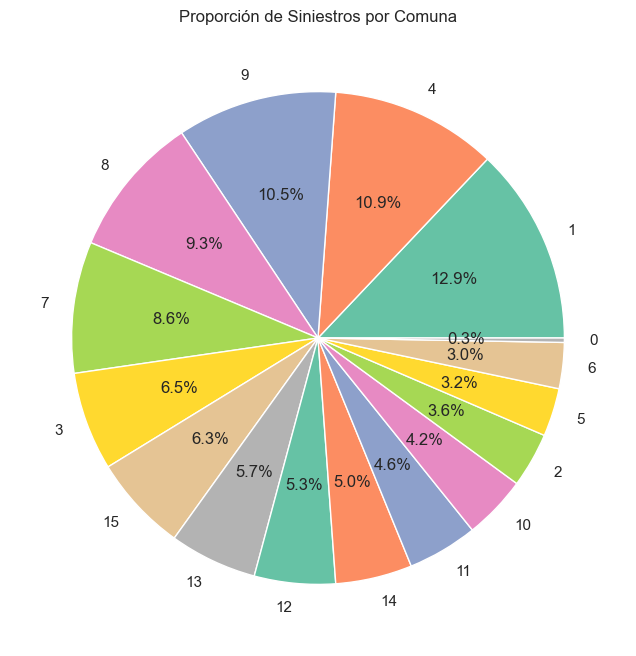

In [18]:
#Grafico de torta para representar la cantidad de siniestros por comuna
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
df_hechos['COMUNA'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Proporción de Siniestros por Comuna')
plt.ylabel('')
plt.show()

Text(0, 0.5, 'Cantidad de Siniestros')

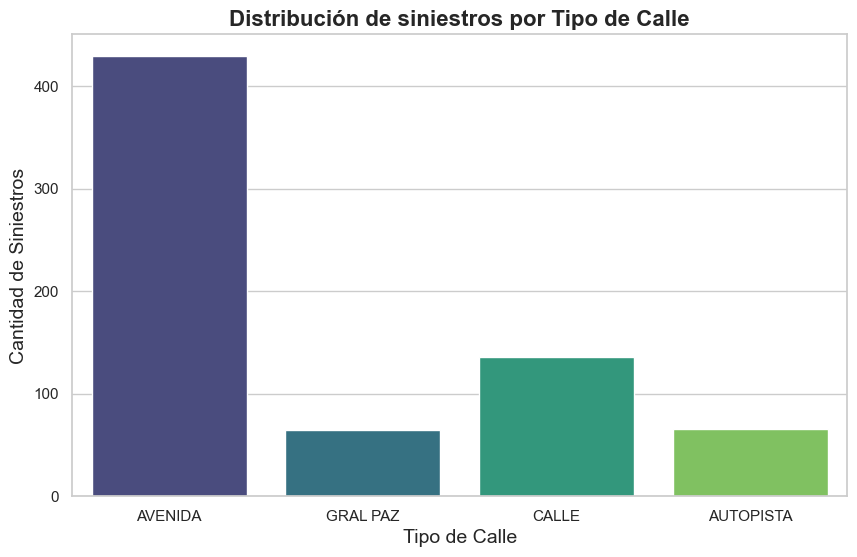

In [19]:
#Grafico de barras para representar la cantidad de siniestros por tipo de calle
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='TIPO_DE_CALLE', data=df_hechos, hue='TIPO_DE_CALLE', palette='viridis', dodge=False, legend=False)

plt.title('Distribución de siniestros por Tipo de Calle', fontsize=16, weight='bold')
plt.xlabel('Tipo de Calle', fontsize=14)
plt.ylabel('Cantidad de Siniestros', fontsize=14)

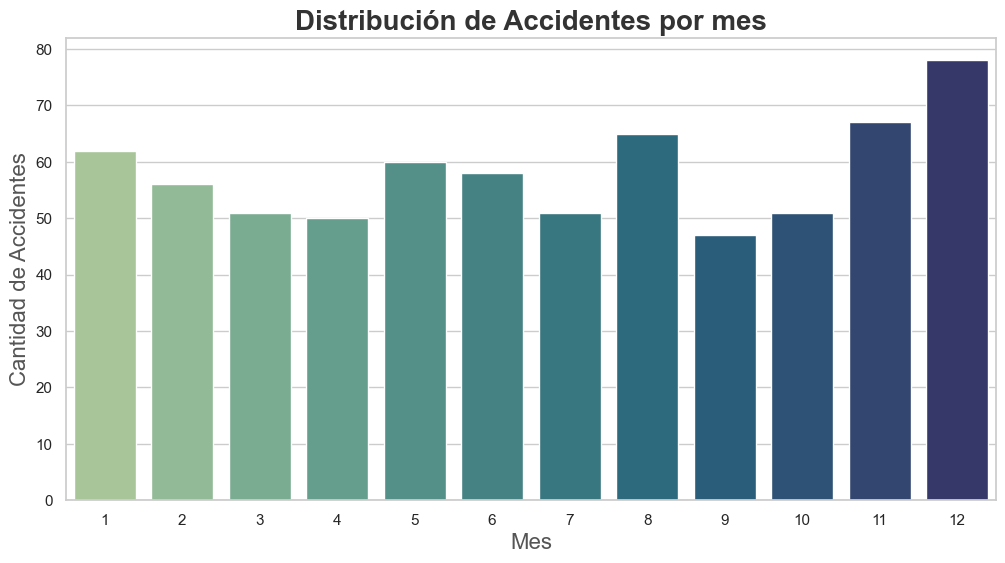

In [20]:
#Grafico de barras para representar la cantidad de accidentes por mes
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='MM',hue="MM",legend=False, data=df_hechos, palette='crest')
plt.title('Distribución de Accidentes por mes', fontsize=20, weight='bold', color='#333333')
plt.xlabel('Mes', fontsize=16, color='#555555')
plt.ylabel('Cantidad de Accidentes', fontsize=16, color='#555555')
plt.show()

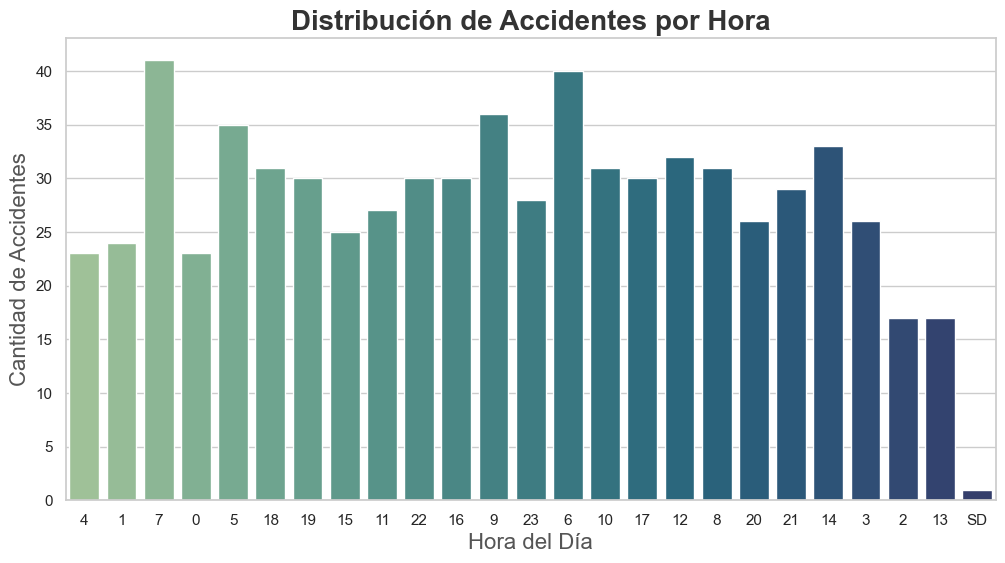

In [21]:
#Grafico de barras para representar la cantidad de accidentes por hora
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='HH',hue="HH",legend=False, data=df_hechos, palette='crest')
plt.title('Distribución de Accidentes por Hora', fontsize=20, weight='bold', color='#333333')
plt.xlabel('Hora del Día', fontsize=16, color='#555555')
plt.ylabel('Cantidad de Accidentes', fontsize=16, color='#555555')
plt.show()


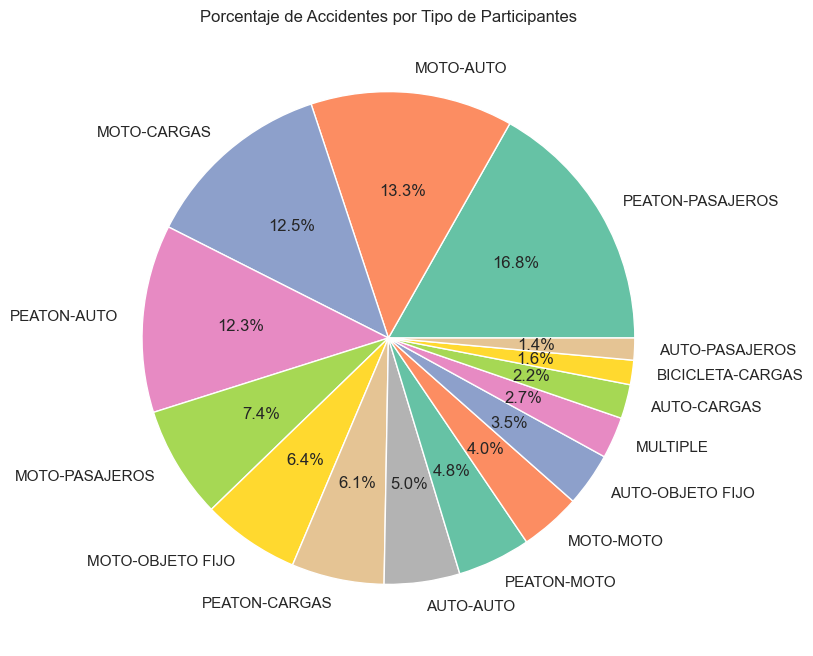

In [22]:
#Grafico de torta que representa el porcentaje de accidentes segun el tipo de autores
#Nota: Solo se toma los 15 primeros debido a que los que no se toman son valores minimos y para no arruinar la estetica del grafico
quince_primeros = df_hechos["PARTICIPANTES"].value_counts().head(15)


sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
quince_primeros.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Porcentaje de Accidentes por Tipo de Participantes')
plt.ylabel('')
plt.show()

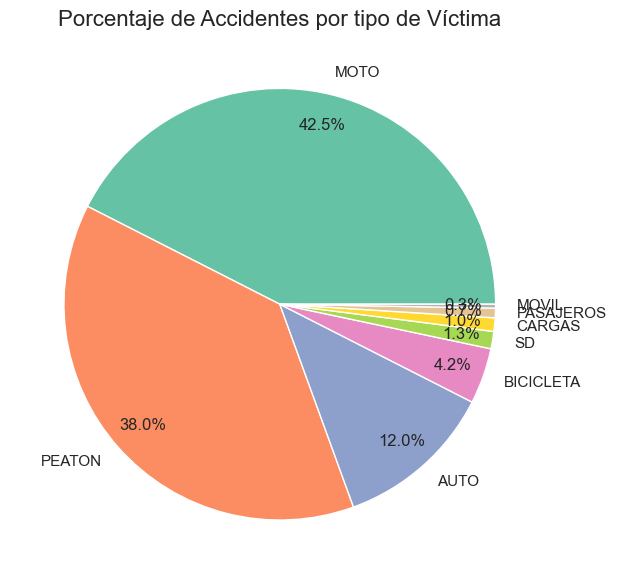

In [23]:
#Grafico de torta para representar el tipo de victima por siniestro
ocho_primeros = df_hechos["VICTIMA"].value_counts().head(8)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ocho_primeros.plot.pie(
    autopct='%1.1f%%', 
    colors=sns.color_palette('Set2'), 
    pctdistance=0.85  
)

plt.title('Porcentaje de Accidentes por tipo de Víctima', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()


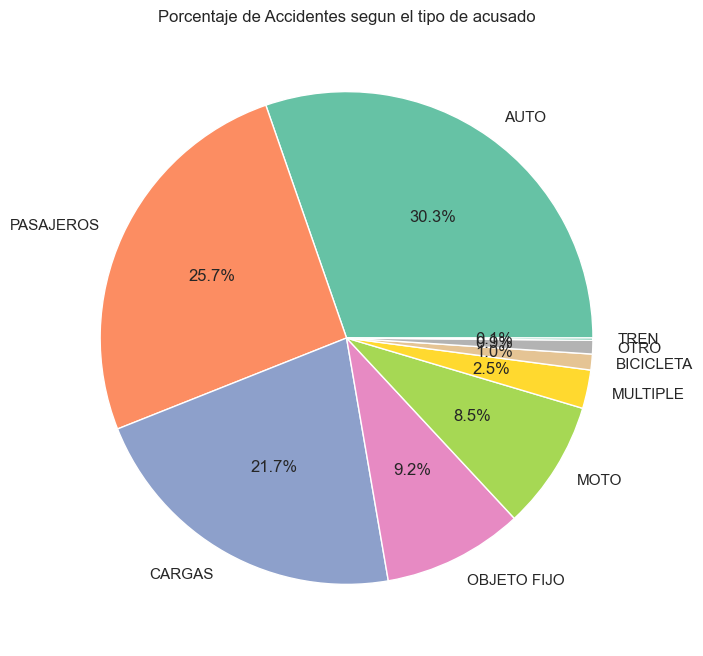

In [24]:
#Grafico de torta para representar el tipo de acusado por siniestro
df_hechos["ACUSADO"] = df_hechos["ACUSADO"].astype(str)

df_hechos_filtered = df_hechos[df_hechos["ACUSADO"] != "SD"]

acusado_counts = df_hechos_filtered["ACUSADO"].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
acusado_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Porcentaje de Accidentes segun el tipo de acusado')
plt.ylabel('')
plt.show()

# EDA para el dataset victimas

In [25]:
df_victimas= pd.read_excel(path, sheet_name="VICTIMAS")

In [26]:
df_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [27]:
df_victimas["ID_hecho"].count()

717

In [28]:
#Verificamos los nulos del dataframe de victimas y observamos que no posee nulos
df_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [29]:
#Analizamos si tiene valores duplicados y observamos que no
df_victimas.duplicated().sum()

0

In [30]:
df_victimas["SEXO"].value_counts()

SEXO
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64

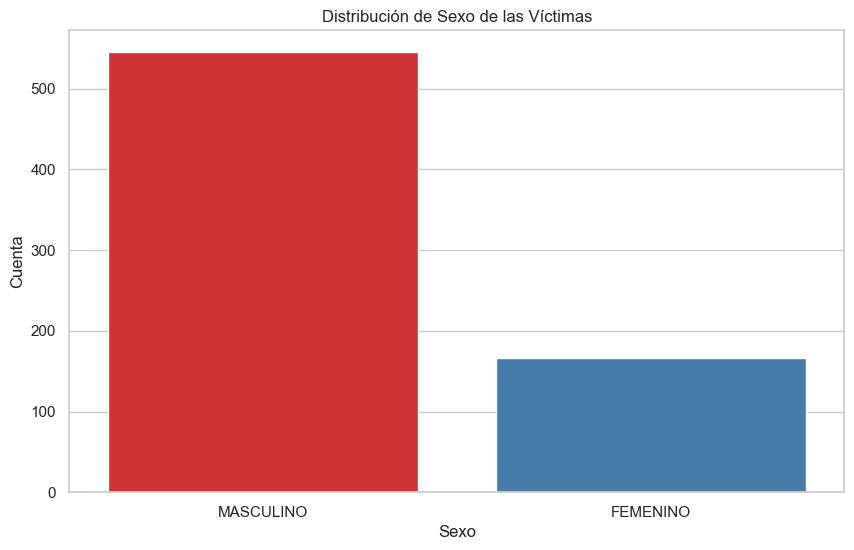

In [31]:
#Grafico de barras para representar la cantidad de victimas segun su sexo
df_victimas_filtrado = df_victimas[df_victimas['SEXO'] != 'SD']

plt.figure(figsize=(10, 6))
sns.countplot(data=df_victimas_filtrado,hue="SEXO", x='SEXO', palette='Set1')
plt.title('Distribución de Sexo de las Víctimas')
plt.xlabel('Sexo')
plt.ylabel('Cuenta')
plt.show()

In [32]:
df_victimas["EDAD"].value_counts()

EDAD
SD    53
30    28
29    24
23    24
27    20
      ..
11     1
13     1
85     1
7      1
88     1
Name: count, Length: 86, dtype: int64

C:\Users\juanc.DESKTOP-LGMDQP1\AppData\Local\Temp\ipykernel_9260\1782015986.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_victimas.replace("SD", np.nan, inplace=True)


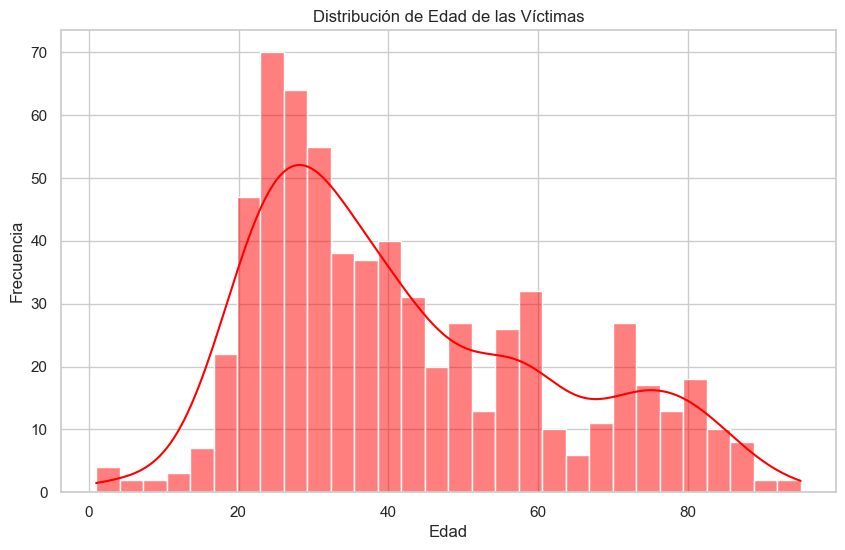

In [33]:
# Histograma para una variable numérica, por ejemplo, 'EDAD'
df_victimas.replace("SD", np.nan, inplace=True)


pd.set_option('mode.chained_assignment', None)  
pd.set_option('future.no_silent_downcasting', True)  

plt.figure(figsize=(10, 6))
sns.histplot(df_victimas['EDAD'].dropna(), bins=30, kde=True, color='red')
plt.title('Distribución de Edad de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()